The distance from $L_2$ to the baricenter of system is given by the positive solution of the following equation:
$$\gamma - (1 - \mu)/(\gamma + \mu)^2 - \mu/(\gamma - 1 + \mu)^2,$$

$$\mu = \frac{M_s}{M_p + M_s},$$
where $M_p$ and $M_s$ denote the masses of the primary and the secondary (smaller of the two primaries) body, respectively.

The equations of motion in the barycentric reference frame (nondimentionlized) [1]:
\begin{align}
\ddot{x} - 2\dot{y} - x &= - \frac{(1-\mu)(x+\mu)}{r_p^3} - \frac{\mu(x-(1-\mu))}{r_s^3}, \\
\ddot{y} + 2\dot{x} - y &= - \frac{(1-\mu)y}{r_p^3} - \frac{\mu y}{r_s^3}, \\
\ddot{z} &= - \frac{(1-\mu)z}{r_p^3} - \frac{\mu z}{r_s^3},
\end{align}
where
$$r_p = \sqrt{(x+\mu)^2 + y^2 + z^2}, \quad r_s = \sqrt{(x-(1-\mu))^2 + y^2 + z^2}.$$ 

The distance between the two primaries is 1, the reference frame origin is based in the system's baricenter.
The conversion from units of distance, velocity, and time in the unprimed, normalized system to the primed, dimensionalized system is:
\begin{align}
d' &= L\cdot d, \\
s' &= V\cdot s, \\
t' &= \frac{T}{2\pi}t,
\end{align}
where $L$ is the distance between the centers of $M_P$ and $M_S$, $V$ is the orbital velocity of $M_S$, $T$ is the orbital period of $M_P$ and $M_S$.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

import env.cr3bp as cr3bp


The following constants (for the Earth-Moon system) are used below:
    $$\mu = 1.215\cdot10^{-2},  [1]$$
    $$L_2 = 1.556825,  [2]$$

[1] Dynamical Systems, the Three-Body Problem and Space Mission Design, http://www.cds.caltech.edu/~marsden/volume/missiondesign/KoLoMaRo_DMissionBk.pdf

[2] Libration point orbits and manifolds: design and station-keeping, 
http://www.mathnet.ru/links/d214da1304703fe544f855e9ed635481/ipmp1942.pdf

In [24]:
em3bp = cr3bp.CR3BP('EM')


l2_x = em3bp.get_L2_quintic()

em3bp.mu, l2_x

(0.012150584269542242, 1.1556821602908094)

In [25]:
time = cr3bp.Parameters()
time.begin = 0
time.end = 10
time.dt = 0.05

rP_0 = [l2_x, 0, 0]
vP_0 = [0, 0, 0]
r_0 = rP_0 + vP_0

t_sol = np.arange(time.begin, time.end, time.dt)

r_sol = em3bp.integrate(r_0, t_sol)
r_sol

array([[1.15568216, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.15568216, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.15568216, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       ...,
       [1.15568216, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.15568216, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.15568216, 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

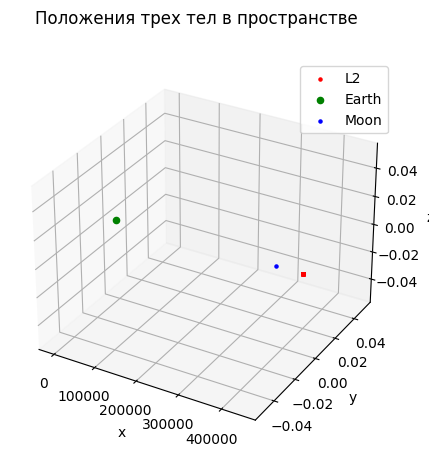

In [26]:
#plt.plot(r_sol[:, 0] - r_sol[0, 0])
#plt.plot(r_sol[:, 1] - r_sol[0, 1])
#plt.plot(r_sol[:, 2] - r_sol[0, 2])
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5,5))
fig.suptitle('Положения трех тел в пространстве')
ax = fig.add_subplot(projection = '3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(r_sol[:, 0] * 384467, r_sol[:, 1]*384467, r_sol[:, 2]*384467, color='r', marker = '.', label = 'L2')
#ax.set_xlim([440000, 445000])
ax.scatter(-4671, 0, 0, color = 'g', marker = 'o', label = 'Earth')
ax.scatter(379795, 0, 0, color = 'b', marker = '.', label = 'Moon')
ax.legend()
plt.show()

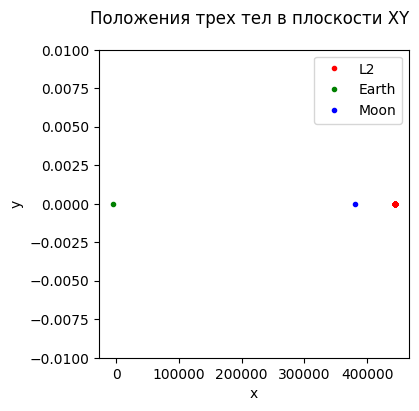

In [27]:
plt.figure(figsize=(4, 4))
x_e = -4671 
x_m = 379795
plt.plot(r_sol[:,0]*384467, r_sol[:, 1], '.r', label = 'L2')
plt.plot(x_e, 0, '.g', label = 'Earth')
plt.plot(x_m, 0, '.b', label = 'Moon')
plt.ylim([-0.01, 0.01])
plt.suptitle('Положения трех тел в плоскости XY')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Jacobi Integral

<font size="3">The equations of motion admit the first integral known as Jacobi integral, which is given by:</font>

### $C = v_x^2 + v_y^2 + v_z^2 - 2U.$

<font size="3"> The plot below shows the relative error of $C$.</font>

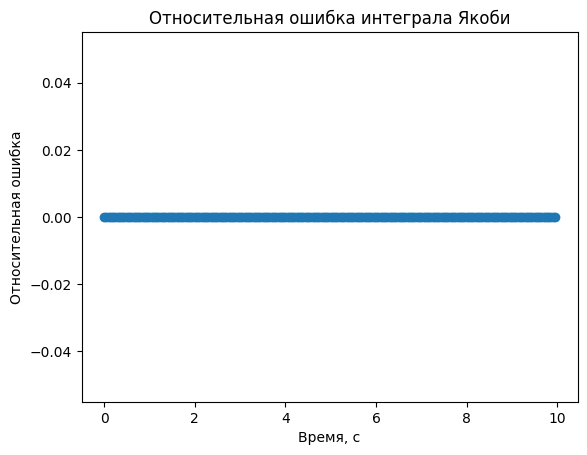

In [28]:
_, rel_error = em3bp.get_jacobi_const(t_sol, r_sol)    
    
plt.scatter(t_sol, rel_error)
plt.xlabel('Время, с')
plt.ylabel('Относительная ошибка')
plt.title('Относительная ошибка интеграла Якоби')
plt.ticklabel_format(useOffset = False)

Проверка табличных значений

In [47]:
import pandas as pd
file = "constants.xlsx"
x, richardson_L1 = cr3bp.halo_R3OA(Az=125000, system="SE", point="L1")
y, richardson_L2 = cr3bp.halo_R3OA(Az=125000, system="SE", point="L2")
df = pd.DataFrame({'constant': ['gamma_L', 'lambda', 'k', 'Delta', 'c2', 'c3', 'c4', 's1', 's2', 'l1', 'l2', 'a1', 'a2', 'd1', 'd2', 'a21', 'a22', 'a23', 'a24', 'a31',
                                'a32', 'b21', 'b22', 'b31', 'b32', 'd21', 'd31', 'd32'],
                   'L1': [richardson_L1.gamma_L, richardson_L1.lmbda, richardson_L1.k, richardson_L1.Delta, richardson_L1.c2, richardson_L1.c3, richardson_L1.c4, richardson_L1.s1, richardson_L1.s2, richardson_L1.l1, richardson_L1.l2, richardson_L1.a1, richardson_L1.a2, richardson_L1.d1, richardson_L1.d2, richardson_L1.a21, richardson_L1.a22, richardson_L1.a23, richardson_L1.a24, richardson_L1.a31, richardson_L1.a32, richardson_L1.b21, richardson_L1.b22, richardson_L1.b31, richardson_L1.b32, richardson_L1.d21,richardson_L1.d31, richardson_L1.d32],
                   'L2': [richardson_L2.gamma_L, richardson_L2.lmbda, richardson_L2.k, richardson_L2.Delta, richardson_L2.c2, richardson_L2.c3, richardson_L2.c4, richardson_L2.s1, richardson_L2.s2, richardson_L2.l1, richardson_L2.l2, richardson_L2.a1, richardson_L2.a2, richardson_L2.d1, richardson_L2.d2, richardson_L2.a21, richardson_L2.a22, richardson_L2.a23, richardson_L2.a24, richardson_L2.a31, richardson_L2.a32, richardson_L2.b21, richardson_L2.b22, richardson_L2.b31, richardson_L2.b32, richardson_L2.d21,richardson_L2.d31, richardson_L2.d32]})
df.to_excel('./constants.xlsx')

Подсчет орбиты

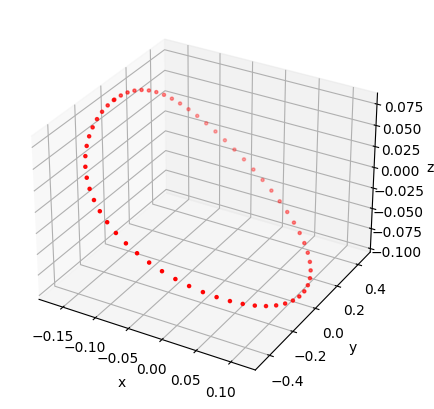

In [64]:
tau1 = cr3bp.Parameters()
tau1.begin = 0
tau1.end = 3.1
tau1.dt = 0.05
tau1_sol = np.arange(tau1.begin, tau1.end, tau1.dt)
x1 = []
y1 = []
z1 = []
for i in tau1_sol:
    x1.append(richardson_L2.a21 * richardson_L2.Ax ** 2 + richardson_L2.a22 * richardson_L2.Az ** 2 - richardson_L2.Ax * np.cos(i * richardson_L2.lmbda) + (richardson_L2.a23 * richardson_L2.Ax ** 2 - richardson_L2.a24 * richardson_L2.Az ** 2 ) * np.cos(2*richardson_L2.lmbda*i) + (richardson_L2.a31 * richardson_L2.Ax ** 3 - richardson_L2.a32 * richardson_L2.Ax * richardson_L2.Az ** 2)*np.cos(3*i*richardson_L2.lmbda) )
    y1.append(richardson_L2.k * richardson_L2.Ax * np.sin(i*richardson_L2.lmbda) + (richardson_L2.b21 * richardson_L2.Ax ** 2 - richardson_L2.b22 * richardson_L2.Az ** 2)*np.sin(2*i*richardson_L2.lmbda) + (richardson_L2.b31 * richardson_L2.Ax ** 3 - richardson_L2.b32 * richardson_L2.Ax * richardson_L2.Az ** 2) * np.sin(3*i*richardson_L2.lmbda))
    z1.append(richardson_L2.Az * np.cos(i*richardson_L2.lmbda) + richardson_L2.d21 * richardson_L2.Ax * richardson_L2.Az * (np.cos(2*i*richardson_L2.lmbda)-3) + (richardson_L2.d32 * richardson_L2.Az * richardson_L2.Ax ** 2 - richardson_L2.d31 * richardson_L2.Az ** 3)*np.cos(3*i*richardson_L2.lmbda))
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection = '3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(x1, y1, z1, color='r', marker = '.')
#ax.scatter(0.0121493, 0, 0, color = 'g', marker = 'o', label = 'Earth')
#ax.scatter(0.987848, 0, 0, color = 'b', marker = '.', label = 'Moon')
plt.show()